In [1]:
# Importing the libraries 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True) 
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno as msno
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing


In [2]:
df_ireland = pd.read_csv('FAOSTAT_data_ireland.csv')
# looking at the dataset
df_ireland.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2018,2018,ha,0.0,A,Official figure
1,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2019,2019,ha,0.0,A,Official figure
2,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2020,2020,ha,0.0,A,Official figure
3,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2018,2018,tonnes,0.0,A,Official figure
4,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2019,2019,tonnes,0.0,A,Official figure


In [3]:
df_ukraine = pd.read_csv('FAOSTAT_data_Ukraine.csv')
df_ukraine.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1992,1992,ha,3500.0,E,Estimated value
1,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1993,1993,ha,3760.0,I,Imputed value
2,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1994,1994,ha,3825.0,I,Imputed value
3,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1995,1995,ha,3000.0,E,Estimated value
4,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1996,1996,ha,5000.0,T,Unofficial figure


In [4]:
df_ukraine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       10291 non-null  object 
 1   Domain            10291 non-null  object 
 2   Area Code (M49)   10291 non-null  int64  
 3   Area              10291 non-null  object 
 4   Element Code      10291 non-null  int64  
 5   Element           10291 non-null  object 
 6   Item Code (CPC)   10291 non-null  object 
 7   Item              10291 non-null  object 
 8   Year Code         10291 non-null  int64  
 9   Year              10291 non-null  int64  
 10  Unit              10291 non-null  object 
 11  Value             9661 non-null   float64
 12  Flag              10291 non-null  object 
 13  Flag Description  10291 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.1+ MB


In [5]:
df_ireland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9751 entries, 0 to 9750
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       9751 non-null   object 
 1   Domain            9751 non-null   object 
 2   Area Code (M49)   9751 non-null   int64  
 3   Area              9751 non-null   object 
 4   Element Code      9751 non-null   int64  
 5   Element           9751 non-null   object 
 6   Item Code (CPC)   9751 non-null   object 
 7   Item              9751 non-null   object 
 8   Year Code         9751 non-null   int64  
 9   Year              9751 non-null   int64  
 10  Unit              9751 non-null   object 
 11  Value             9181 non-null   float64
 12  Flag              9751 non-null   object 
 13  Flag Description  9751 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.0+ MB


In [6]:
df_ukraine['Element'].value_counts()

Production                       4108
Area harvested                   2404
Yield                            2377
Producing Animals/Slaughtered     638
Stocks                            377
Yield/Carcass Weight              242
Milk Animals                      116
Laying                             29
Name: Element, dtype: int64

In [7]:
df_ireland['Element'].value_counts()

Production                       4241
Area harvested                   1818
Yield                            1634
Producing Animals/Slaughtered     816
Stocks                            651
Yield/Carcass Weight              471
Milk Animals                       63
Laying                             57
Name: Element, dtype: int64

<AxesSubplot:>

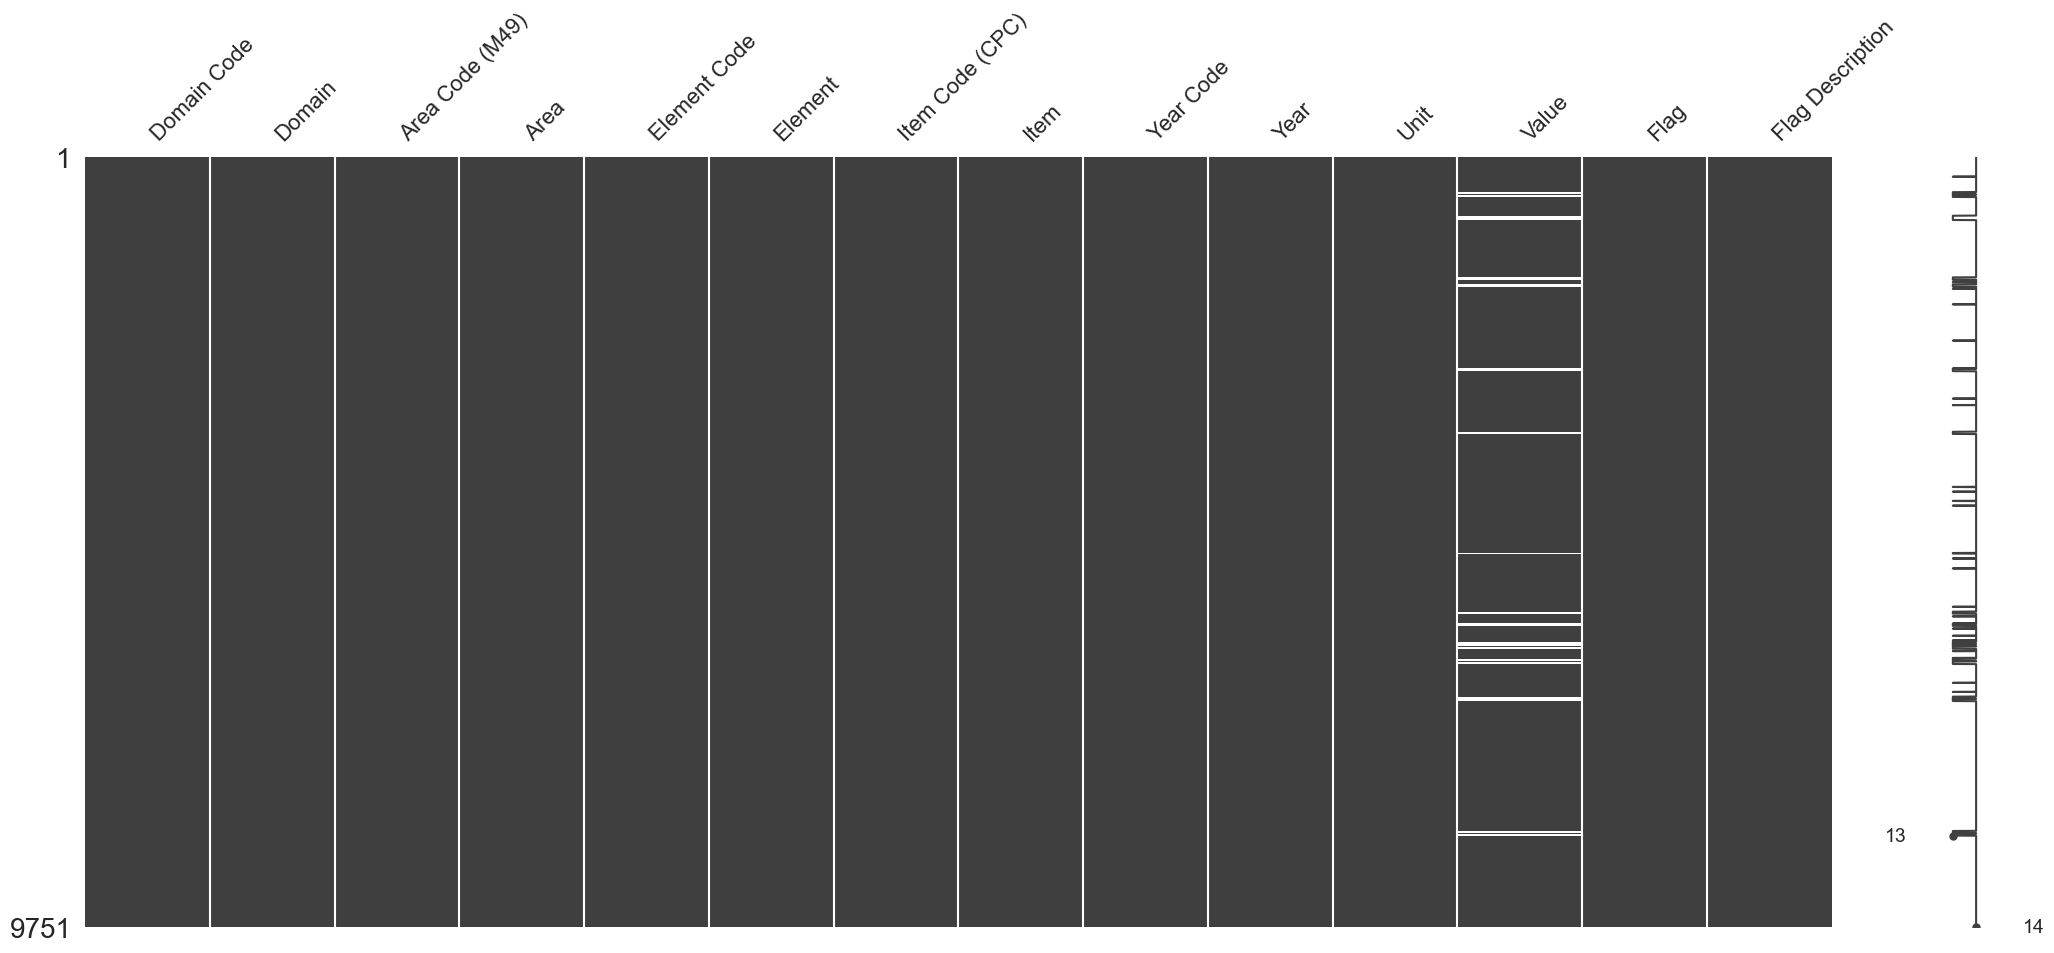

In [8]:
msno.matrix(df_ireland) 

In [9]:
df_ireland.isnull().sum()

Domain Code           0
Domain                0
Area Code (M49)       0
Area                  0
Element Code          0
Element               0
Item Code (CPC)       0
Item                  0
Year Code             0
Year                  0
Unit                  0
Value               570
Flag                  0
Flag Description      0
dtype: int64

In [10]:
df_ireland = df_ireland.dropna()
df_ireland.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

<AxesSubplot:>

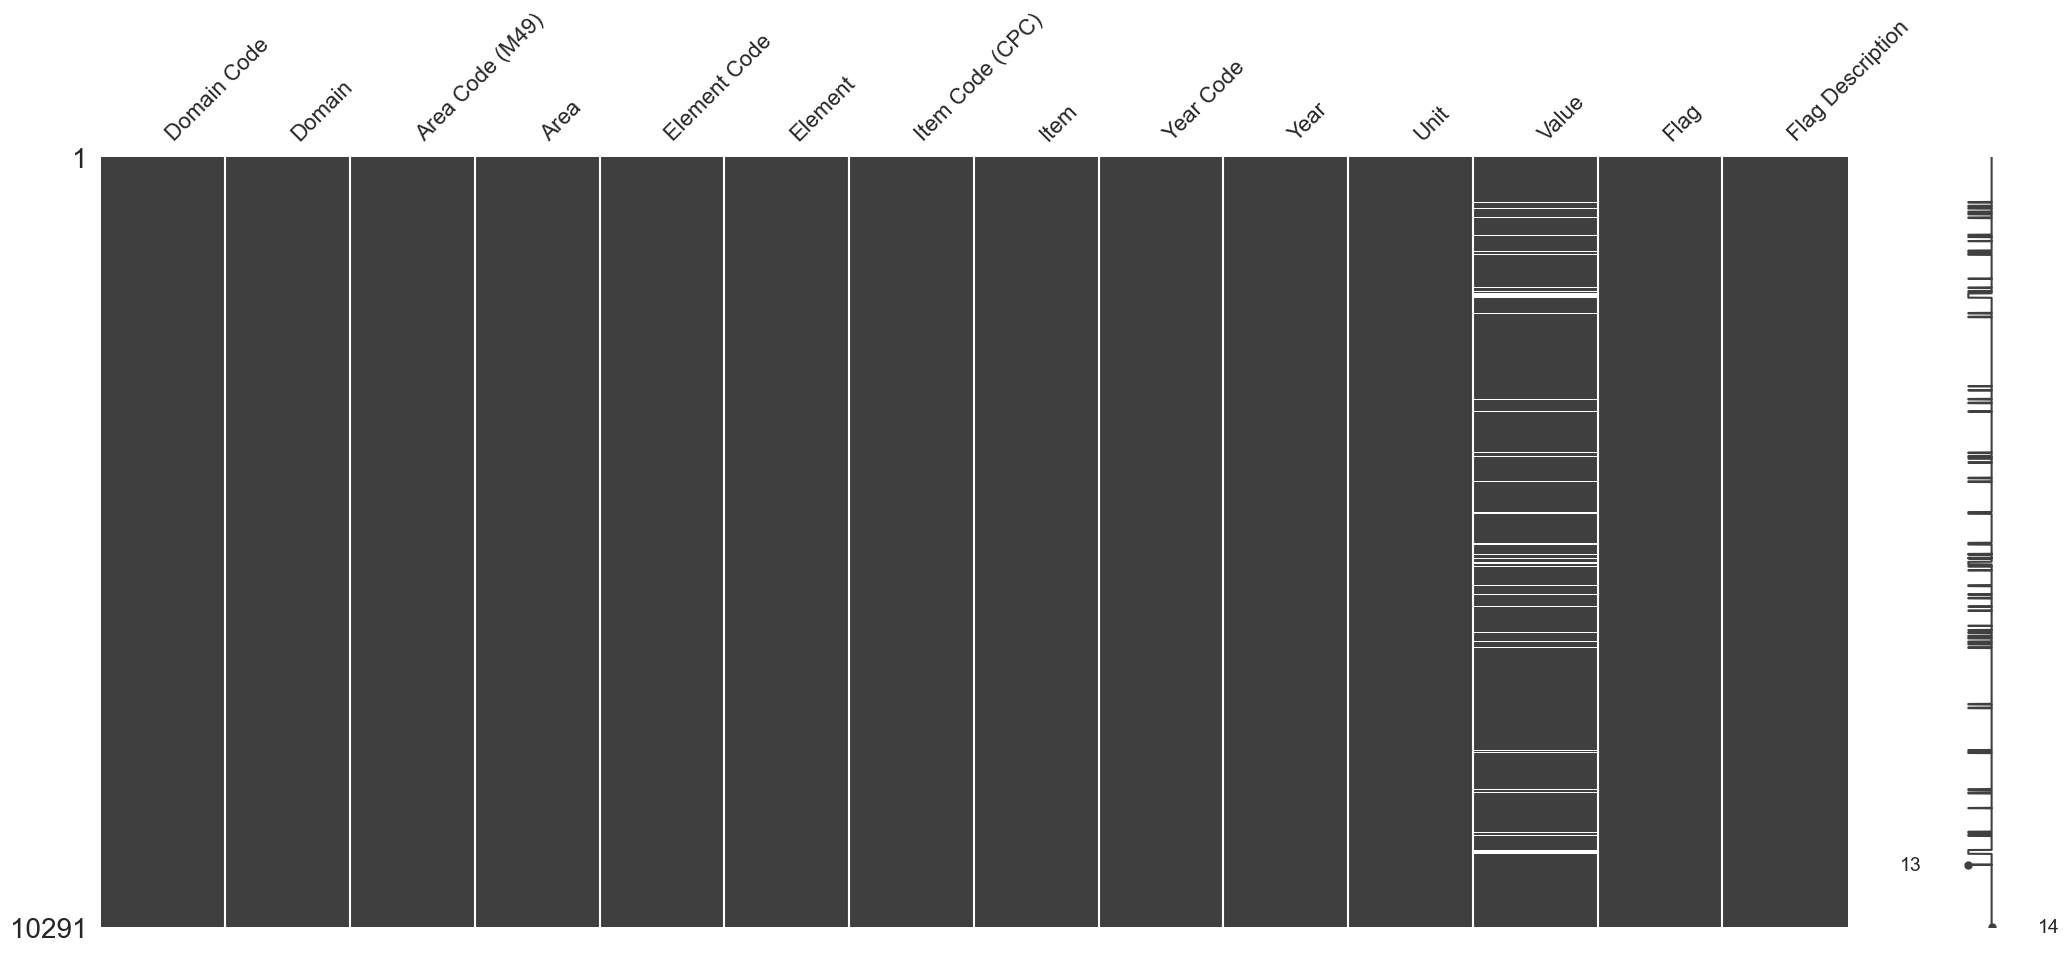

In [11]:
msno.matrix(df_ukraine) 

In [12]:
df_ukraine = df_ukraine.dropna()
df_ukraine.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [13]:
# Rows containing duplicate data 
duplicate_rows_df_ukraine = df_ukraine[df_ukraine.duplicated()]
print("number of duplicate rows:", duplicate_rows_df_ukraine.shape)

number of duplicate rows: (0, 14)


In [14]:
# Rows containing duplicate data 
duplicate_rows_df_ireland = df_ireland[df_ireland.duplicated()]
print("number of duplicate rows:", duplicate_rows_df_ireland.shape)

number of duplicate rows: (0, 14)


In [15]:
df_ukraine.describe(include = "all")

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
count,9661,9661,9661.0,9661,9661.000000,9661,9661,9661,9661.000000,9661.000000,9661,9.661000e+03,9661,9661
unique,1,1,NaN,1,NaN,8,155,155,NaN,NaN,11,NaN,4,4
top,QCL,Crops and livestock products,NaN,Ukraine,NaN,Production,0231,"Hen eggs in shell, fresh",NaN,NaN,tonnes,NaN,A,Official figure
freq,9661,9661,NaN,9661,NaN,3771,145,145,NaN,NaN,3713,NaN,5100,5100
mean,NaN,NaN,804.0,NaN,5411.326260,NaN,NaN,NaN,2006.547459,2006.547459,NaN,7.324167e+05,NaN,NaN
std,NaN,NaN,0.0,NaN,100.370632,NaN,NaN,NaN,8.220420,8.220420,NaN,2.715715e+06,NaN,NaN
min,NaN,NaN,804.0,NaN,5111.000000,NaN,NaN,NaN,1992.000000,1992.000000,NaN,0.000000e+00,NaN,NaN
25%,NaN,NaN,804.0,NaN,5312.000000,NaN,NaN,NaN,2000.000000,2000.000000,NaN,5.000000e+03,NaN,NaN
50%,NaN,NaN,804.0,NaN,5419.000000,NaN,NaN,NaN,2007.000000,2007.000000,NaN,2.568200e+04,NaN,NaN
75%,NaN,NaN,804.0,NaN,5510.000000,NaN,NaN,NaN,2014.000000,2014.000000,NaN,1.530910e+05,NaN,NaN


array([[<AxesSubplot:title={'center':'Area Code (M49)'}>,
        <AxesSubplot:title={'center':'Element Code'}>],
       [<AxesSubplot:title={'center':'Year Code'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Value'}>, <AxesSubplot:>]],
      dtype=object)

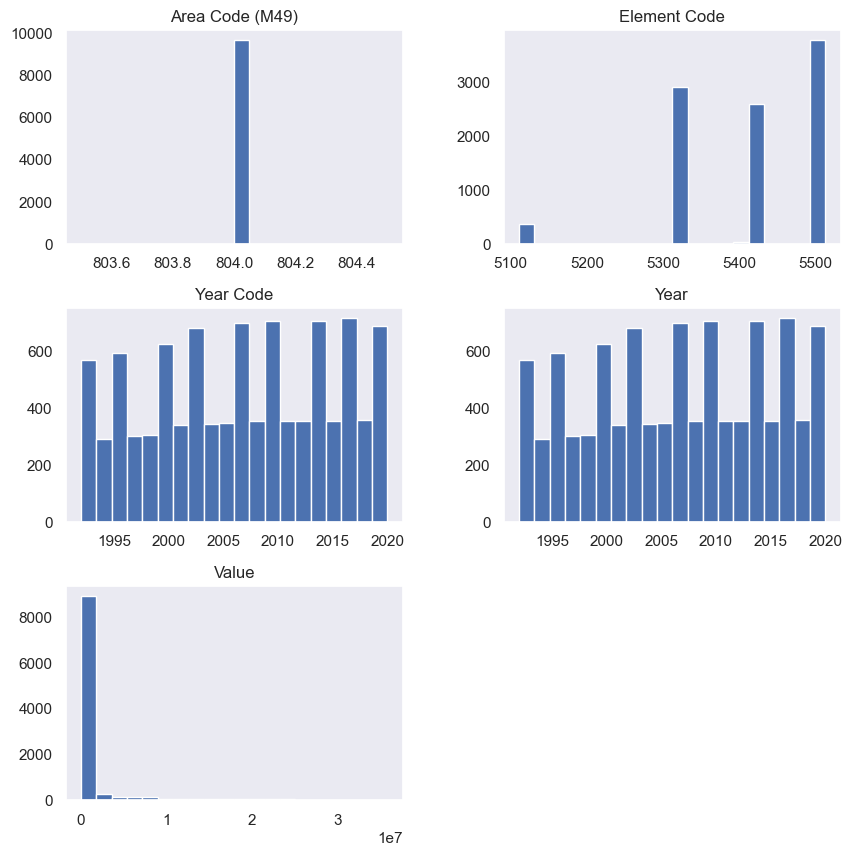

In [16]:
df_ukraine.hist(figsize=(10,10), bins=20, grid=False)

<AxesSubplot:xlabel='Value'>

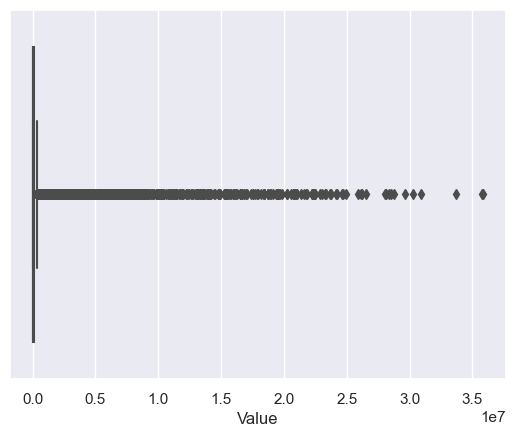

In [17]:
sns.boxplot(x=df_ukraine["Value"], whis=1.5)  

In [18]:
df_ukraine['Value'].value_counts()

100.0      92
500.0      71
5000.0     64
10000.0    60
1000.0     55
           ..
1804.0      1
1601.0      1
1653.0      1
1755.0      1
80650.0     1
Name: Value, Length: 6331, dtype: int64

In [19]:
Q1 = df_ukraine.quantile(0.25)
Q3 = df_ukraine.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Area Code (M49)         0.0
Element Code          198.0
Year Code              14.0
Year                   14.0
Value              148091.0
dtype: float64


In [20]:
df_ukraine.shape

(9661, 14)

In [21]:
df_ukraine = df_ukraine[~((df_ukraine < (Q1-1.5 * IQR)) |(df_ukraine > (Q3 + 1.5 * IQR))).any(axis=1)]
df_ukraine.shape

(7918, 14)

In [22]:
df_ukraine['Value'].value_counts()

100.0       92
500.0       71
5000.0      64
10000.0     60
1000.0      55
            ..
106803.0     1
99307.0      1
94061.0      1
97204.0      1
80650.0      1
Name: Value, Length: 4918, dtype: int64

<AxesSubplot:xlabel='Value'>

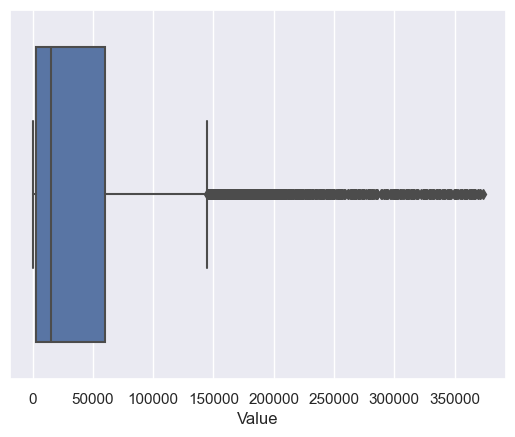

In [23]:
sns.boxplot(x=df_ukraine["Value"], whis=1.5)  

<AxesSubplot:>

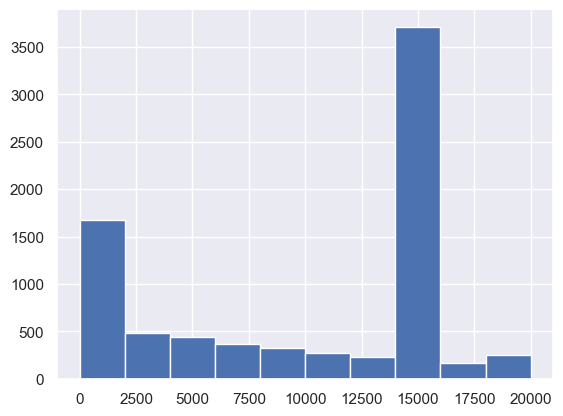

In [24]:
df_ukraine.loc[df_ukraine["Value"]> 20000, 'Value'] = df_ukraine["Value"].median()
df_ukraine["Value"].hist()

<AxesSubplot:xlabel='Value'>

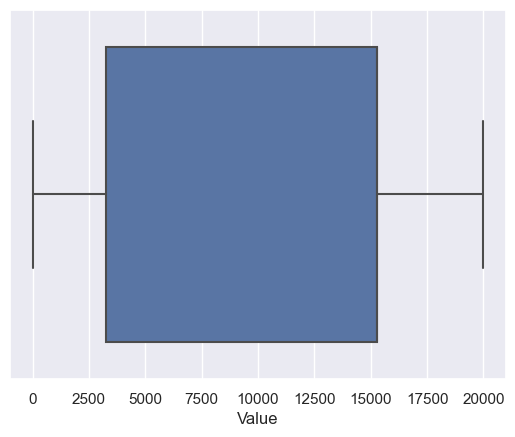

In [25]:
sns.boxplot(x=df_ukraine["Value"], whis=1.5)  

In [26]:
df_ukraine.shape

(7918, 14)

<AxesSubplot:>

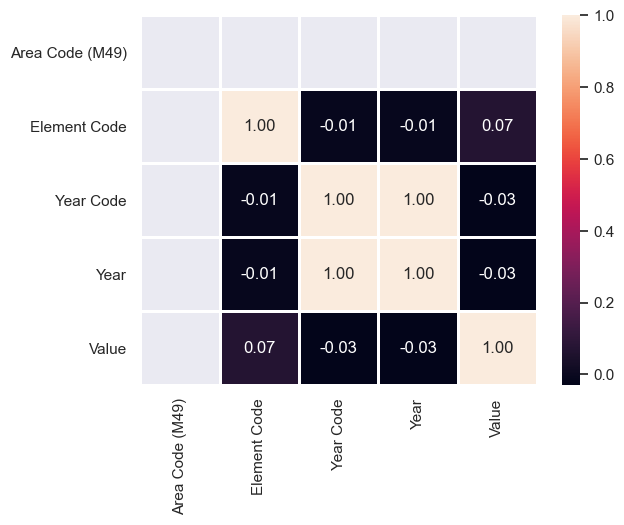

In [27]:
sns.heatmap(df_ukraine.corr(), annot = True, fmt = '.2f', linewidths = 2)

In [28]:
import scipy
from scipy import stats

stat, p = scipy.stats.shapiro(df_ukraine['Value']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.805, p-value=0.000
Отклонить гипотезу о нормальности


In [29]:
stat, p = scipy.stats.normaltest(df_ukraine['Value']) # Критерий согласия Пирсона
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=59041.533, p-value=0.000
Отклонить гипотезу о нормальности


In [30]:
df_ukraine['Element'].value_counts()

Production                       2926
Yield                            2367
Area harvested                   1879
Yield/Carcass Weight              242
Stocks                            228
Producing Animals/Slaughtered     213
Milk Animals                       34
Laying                             29
Name: Element, dtype: int64

### Обьединение колонок с помощью merge

In [31]:
%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 

In [32]:
df_ireland.shape

(9181, 14)

In [33]:
df_ukraine.shape

(7918, 14)

### Обьединение двух таблиц

In [34]:
outer_merge=pd.merge(df_ireland, df_ukraine, how="outer")

In [35]:
outer_merge.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2018,2018,ha,0.0,A,Official figure
1,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2019,2019,ha,0.0,A,Official figure
2,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2020,2020,ha,0.0,A,Official figure
3,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2018,2018,tonnes,0.0,A,Official figure
4,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2019,2019,tonnes,0.0,A,Official figure


In [36]:
df = outer_merge

In [37]:
df.shape

(17099, 14)

In [38]:
df['Element Code'].value_counts()

5510    6893
5419    3493
5312    3391
5320     658
5111     439
5417     382
5112     373
5420     366
5321     365
5424     331
5318      97
5410      86
5313      86
5413      56
5513      54
5114      29
Name: Element Code, dtype: int64

In [39]:
df['Element'].value_counts()

Production                       6947
Yield                            4001
Area harvested                   3391
Producing Animals/Slaughtered    1023
Stocks                            841
Yield/Carcass Weight              713
Milk Animals                       97
Laying                             86
Name: Element, dtype: int64

In [40]:
df['Item Code (CPC)'].value_counts()

0231        312
01354       267
01213       267
21118.01    258
01242       258
           ... 
2165          5
21631.02      5
02112         3
02212         3
0143          2
Name: Item Code (CPC), Length: 176, dtype: int64

In [41]:
df['Item'].value_counts()

Hen eggs in shell, fresh        312
Strawberries                    267
Cauliflowers and broccoli       267
Horse meat, fresh or chilled    258
Peas, green                     258
                               ... 
Palm oil                          5
Safflower-seed oil, crude         5
Buffalo                           3
Raw milk of buffalo               3
Cotton seed                       2
Name: Item, Length: 176, dtype: int64

In [42]:
df['Year'].value_counts()

2019    492
2018    482
2017    480
2016    474
2015    470
2014    468
2013    466
2011    466
2012    465
2007    465
2003    464
2010    464
2009    464
2008    464
2006    464
2005    460
2002    460
2004    459
2020    459
2001    458
2000    438
1999    429
1998    429
1997    418
1996    415
1995    413
1994    410
1992    406
1993    402
1991    178
1990    156
1988    147
1989    146
1986    140
1987    139
1985    138
1984    134
1983    134
1982    131
1981    130
1979    130
1980    128
1978    127
1975    124
1974    124
1977    124
1976    124
1969    120
1965    120
1964    119
1971    119
1970    119
1967    119
1966    118
1963    118
1962    118
1968    118
1972    118
1961    118
1973    117
Name: Year, dtype: int64

In [43]:
df['Unit'].value_counts()

tonnes       6893
hg/ha        3493
ha           3391
Head         1194
1000 Head     824
hg/An         748
0.1g/An       331
100mg/An       86
No/An          56
1000 No        54
No             29
Name: Unit, dtype: int64

In [44]:
df['Flag'].value_counts()

A    7459
E    6136
I    2524
T     980
Name: Flag, dtype: int64

In [45]:
df['Flag Description'].value_counts()

Official figure      7459
Estimated value      6136
Imputed value        2524
Unofficial figure     980
Name: Flag Description, dtype: int64

In [ ]:
df = df.query("Flag Description=='Unofficial figure'")

In [46]:
df=df.drop(columns=['Domain Code','Domain', 'Year Code'])
df.head(10)

,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year,Unit,Value,Flag,Flag Description
0,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2018,ha,0.0,A,Official figure
1,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2019,ha,0.0,A,Official figure
2,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2020,ha,0.0,A,Official figure
3,372,Ireland,5510,Production,01371,"Almonds, in shell",2018,tonnes,0.0,A,Official figure
4,372,Ireland,5510,Production,01371,"Almonds, in shell",2019,tonnes,0.0,A,Official figure
5,372,Ireland,5510,Production,01371,"Almonds, in shell",2020,tonnes,0.0,A,Official figure
6,372,Ireland,5312,Area harvested,01341,Apples,1961,ha,3000.0,E,Estimated value
7,372,Ireland,5312,Area harvested,01341,Apples,1962,ha,3000.0,E,Estimated value
8,372,Ireland,5312,Area harvested,01341,Apples,1963,ha,3000.0,E,Estimated value
9,372,Ireland,5312,Area harvested,01341,Apples,1964,ha,2000.0,E,Estimated value


In [47]:
df=df.drop(columns=['Area Code (M49)','Element Code', 'Item Code (CPC)', 'Flag'])
df.head(10)

,Area,Element,Item,Year,Unit,Value,Flag Description
0,Ireland,Area harvested,"Almonds, in shell",2018,ha,0.0,Official figure
1,Ireland,Area harvested,"Almonds, in shell",2019,ha,0.0,Official figure
2,Ireland,Area harvested,"Almonds, in shell",2020,ha,0.0,Official figure
3,Ireland,Production,"Almonds, in shell",2018,tonnes,0.0,Official figure
4,Ireland,Production,"Almonds, in shell",2019,tonnes,0.0,Official figure
5,Ireland,Production,"Almonds, in shell",2020,tonnes,0.0,Official figure
6,Ireland,Area harvested,Apples,1961,ha,3000.0,Estimated value
7,Ireland,Area harvested,Apples,1962,ha,3000.0,Estimated value
8,Ireland,Area harvested,Apples,1963,ha,3000.0,Estimated value
9,Ireland,Area harvested,Apples,1964,ha,2000.0,Estimated value


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17099 entries, 0 to 17098
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              17099 non-null  object 
 1   Element           17099 non-null  object 
 2   Item              17099 non-null  object 
 3   Year              17099 non-null  int64  
 4   Unit              17099 non-null  object 
 5   Value             17099 non-null  float64
 6   Flag Description  17099 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.0+ MB


In [49]:
df1 = df.query("Item=='Apples'")
df1.head(20)

,Area,Element,Item,Year,Unit,Value,Flag Description
6,Ireland,Area harvested,Apples,1961,ha,3000.0,Estimated value
7,Ireland,Area harvested,Apples,1962,ha,3000.0,Estimated value
8,Ireland,Area harvested,Apples,1963,ha,3000.0,Estimated value
9,Ireland,Area harvested,Apples,1964,ha,2000.0,Estimated value
10,Ireland,Area harvested,Apples,1965,ha,1500.0,Estimated value
11,Ireland,Area harvested,Apples,1966,ha,1000.0,Estimated value
12,Ireland,Area harvested,Apples,1967,ha,1000.0,Estimated value
13,Ireland,Area harvested,Apples,1968,ha,1500.0,Estimated value
14,Ireland,Area harvested,Apples,1969,ha,1500.0,Estimated value
15,Ireland,Area harvested,Apples,1970,ha,1400.0,Estimated value


In [52]:
import scipy
from scipy import stats

stat, p = scipy.stats.shapiro(df1['Value']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.661, p-value=0.000
Отклонить гипотезу о нормальности


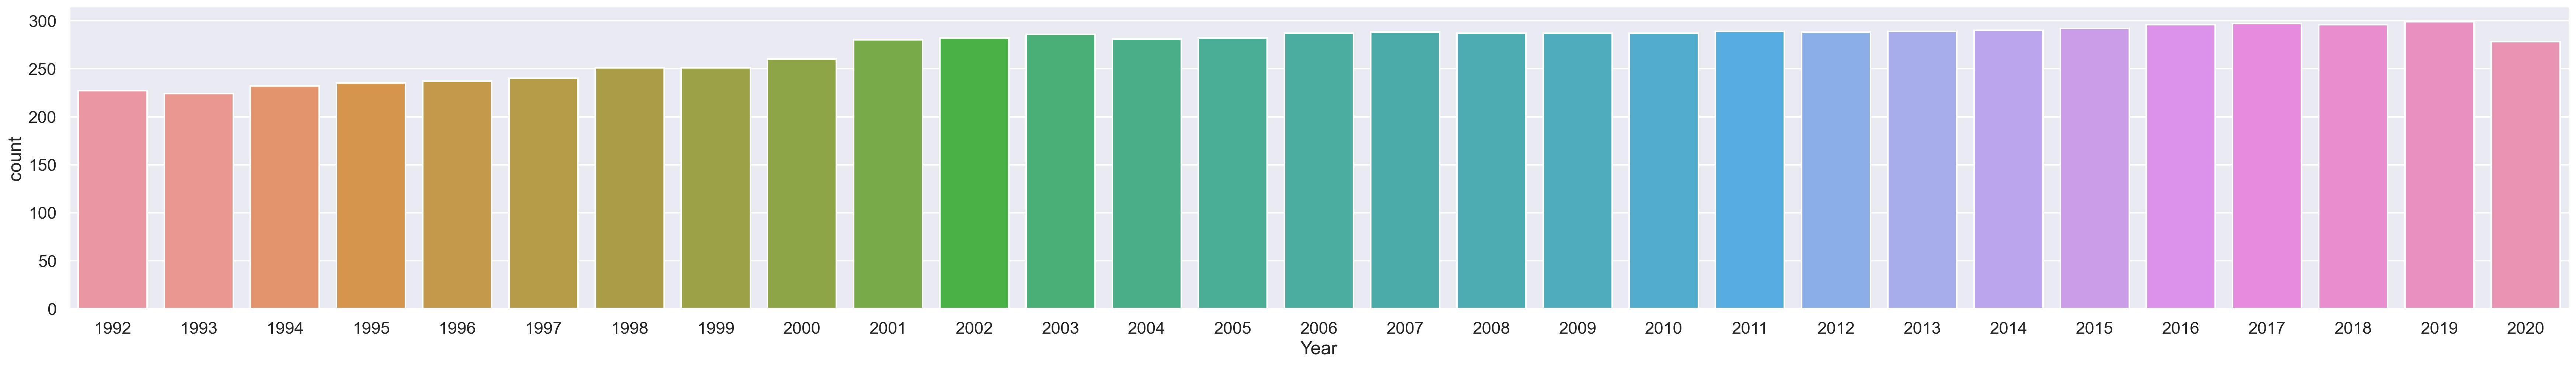

In [59]:
sns.factorplot(x='Year',data=df_ukraine,kind='count',size=5,aspect=7)

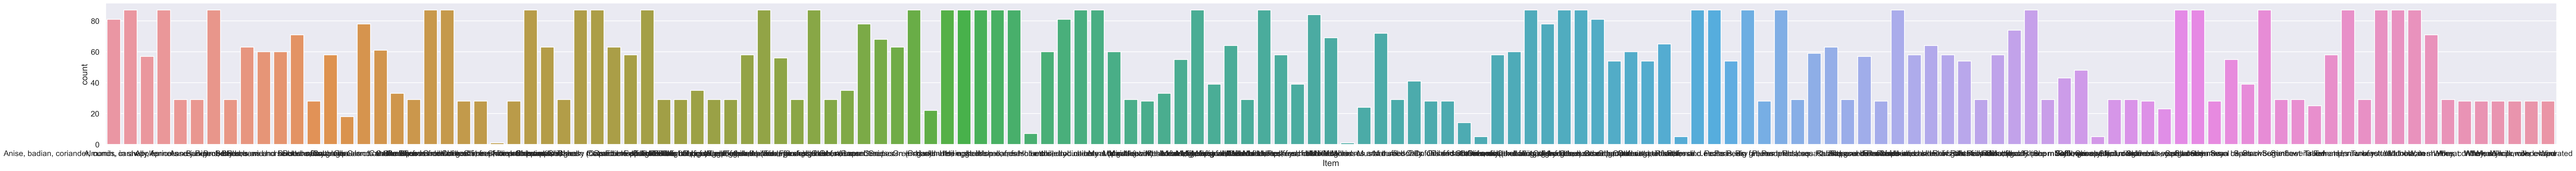

In [61]:
sns.factorplot(x='Item',data=df_ukraine,kind='count',size=5,aspect=15)